### Исследование оттока клиентов банка

Импорт библиотек

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Загрузка и просмотр данных

In [25]:
churn_df = pd.read_csv('data/churn.zip').drop(columns=['RowNumber'])

In [26]:
churn_df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

Text(0.5, 1.0, 'Loyal and exited clients')

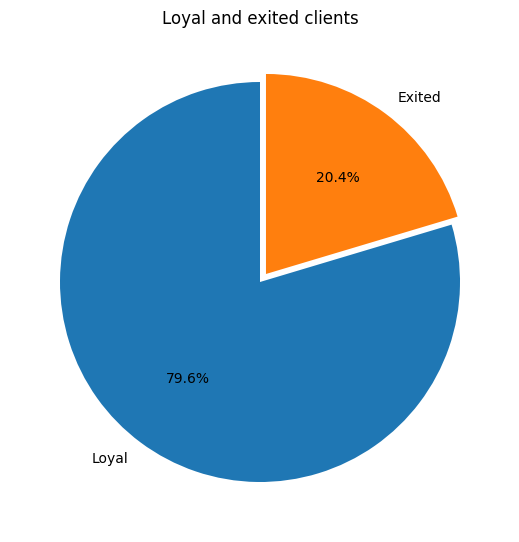

In [27]:
loyalty_data = churn_df['Exited'].map({0: 'Loyal', 1: 'Exited'}).value_counts()

fig = plt.figure(figsize=(7,5))
axes = fig.add_axes([0, 0, 1, 1])
pie_chart = axes.pie(loyalty_data, labels=loyalty_data.index, autopct='%.1f%%', startangle=90, explode=[0, 0.05])
axes.set_title('Loyal and exited clients')

Диаграмма показывает, что каждый пятый клиент банка полностью отказался от использования его услуг.

2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

Text(0.5, 1.0, 'Distribution of clients versus balance')

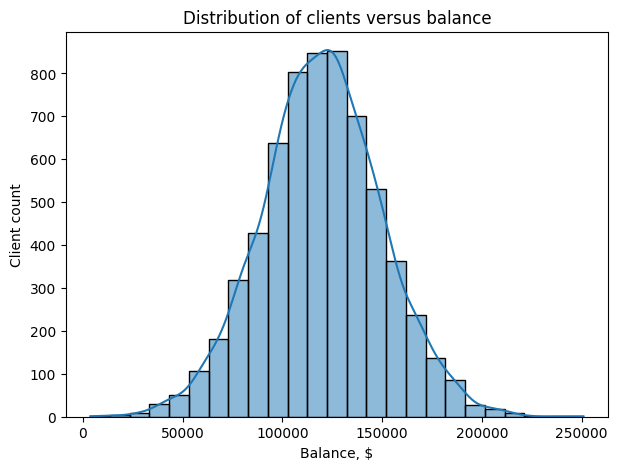

In [28]:
balanses = churn_df.loc[churn_df['Balance'] > 2500.0]['Balance']

fig = plt.figure(figsize=(7,5))
hist_plot = sns.histplot(balanses, bins=25, kde=True)
hist_plot.set_xlabel('Balance, $')
hist_plot.set_ylabel('Client count')
hist_plot.set_title('Distribution of clients versus balance')

Распределение клиентов банка по величине баланса близко к нормальному. Большая часть клиентов хранит на счёте от 80000 до 150000 долларов.

3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

In [29]:
churn_df['ExitedStr'] = churn_df['Exited'].map({0: 'Loyal', 1: 'Exited'})
balanses_2 = churn_df.loc[churn_df['Balance'] > 2500.0]

Text(0.5, 1.0, 'Client balance versus his loyalty')

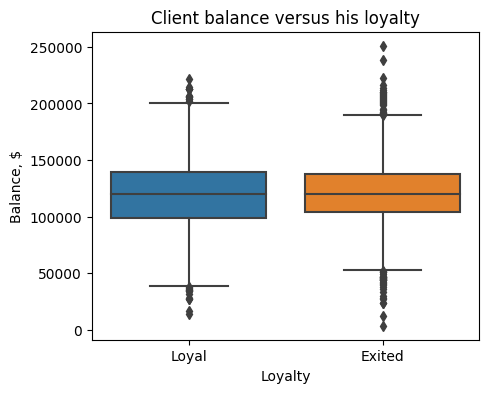

In [30]:
fig = plt.figure(figsize=(5,4))
box_plot = sns.boxplot(balanses_2, x='ExitedStr', y='Balance', orient='v')
box_plot.set_xlabel('Loyalty')
box_plot.set_ylabel('Balance, $')
box_plot.set_title('Client balance versus his loyalty')

Медианные суммы на счетах лояльных и ушедших клиентов практически одинаковы. Выбросы в столбце ушедших клиентов показывают, что среди них есть и те, кто держал очень мало средств на счёте, так и те, кто держал много средств. Те, кто держал мало средств, скорее всего держат их в банках-конкурентах, предлагающих лучшие условия хранения средств и проведения платежей. Те, кто держал много средств, вероятно, не были удовлетворены лишними накладными расходами (комиссиями) в операциях со счётом, и соответственно перевели свои деньги в другие банки. Чтобы сократить отток клиентов, держащих много средств, можно ввести пакет за ежемесячную плату, которые обнуляет комиссии за платежи и обслуживание, а также повысить начисляемый процент на остаток на счёте. Для сокращения оттока клиентов, держащих мало средств, можно расширить перечень товаров и услуг, за которые происходит выплата кэшбека, и повысить процент возвращаемых средств.

4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

Text(0.5, 1.0, 'Client age versus loyalty')

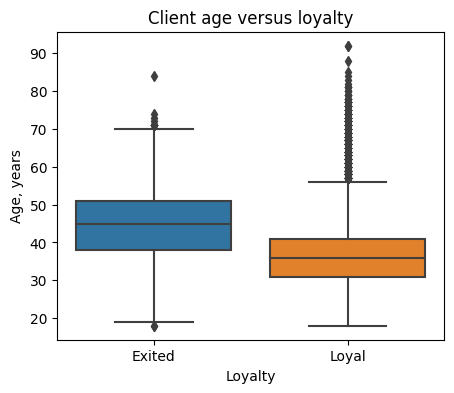

In [31]:
fig = plt.figure(figsize=(5,4))
box_plot = sns.boxplot(churn_df, x='ExitedStr', y='Age', orient='v')
box_plot.set_xlabel('Loyalty')
box_plot.set_ylabel('Age, years')
box_plot.set_title('Client age versus loyalty')

Ушедшие клиенты имеют в среднем возраст от 38 до 52 лет, в то время как лояльные клиенты имеют возраст от 31 до 42 лет, то есть ушедшие клиенты являются более возрастными по сравнению с лояльными клиентами. Это может быть связано с излишней цифровизацией услуг банка, их завязкой на мобильное приложение и веб-сервис, что вызывает затруднения в использовании таких услуг людьми старшего поколения. Для удержания таких клиентов, которые к тому же имеют больше накоплений по сравнеию с молодыми клиентами, нужно обеспечить предоставление банковских услуг в традиционном формате без завязки на мобильное приложение и веб-сервис.

5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

Text(0.5, 1.0, 'Client salary and credit score')

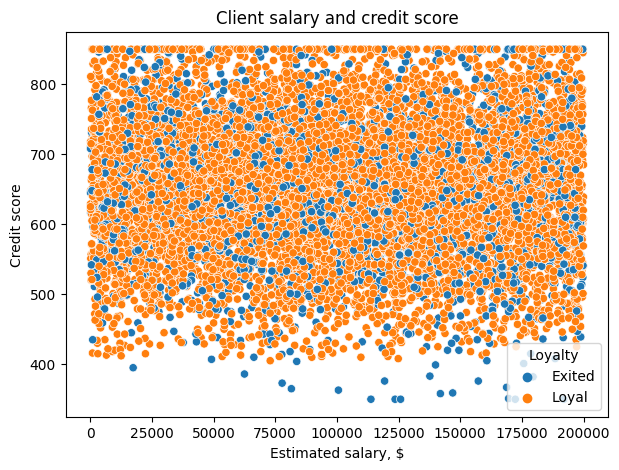

In [32]:
fig = plt.figure(figsize=(7,5))
scatter_plot = sns.scatterplot(churn_df, x='EstimatedSalary', y='CreditScore', hue='ExitedStr')
scatter_plot.legend(title='Loyalty')
scatter_plot.set_xlabel('Estimated salary, $')
scatter_plot.set_ylabel('Credit score')
scatter_plot.set_title('Client salary and credit score')

Text(0.5, 1.0, 'Client estimated salary versus his credit score')

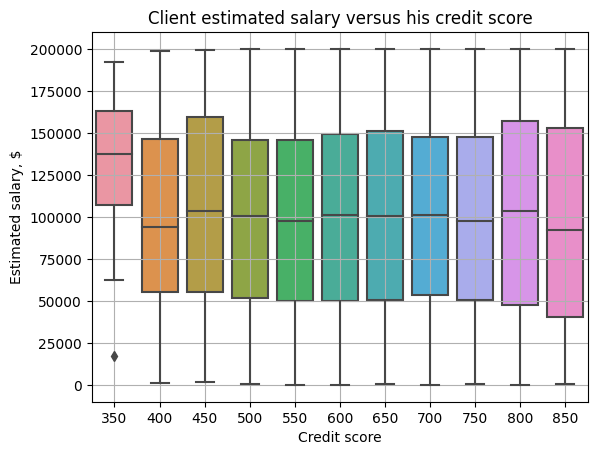

In [33]:
churn_df['CreditLevel'] = np.int32(churn_df['CreditScore'] / 50) * 50

box_plot = sns.boxplot(churn_df, x='CreditLevel', y='EstimatedSalary', orient='v')
box_plot.grid()
box_plot.set_xlabel('Credit score')
box_plot.set_ylabel('Estimated salary, $')
box_plot.set_title('Client estimated salary versus his credit score')

Диаграмма рассеяния и коробчатая диаграмма указывают на отсутствие связи между кредитным рейтингом и уровнем доходов клиентов. 

6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

Text(0.5, 1.0, 'Exited clients')

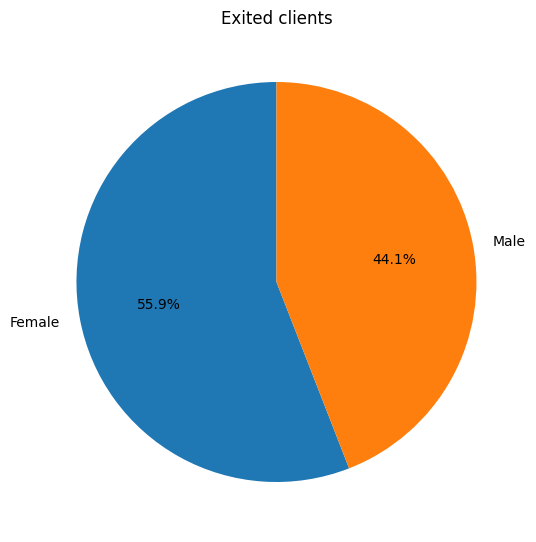

In [34]:
gender_churn_data = churn_df.loc[churn_df['ExitedStr'] == 'Exited']['Gender'].value_counts()
fig = plt.figure(figsize=(7,5))
pie_chart_axes = fig.add_axes([0, 0, 1, 1])
pie_chart = pie_chart_axes.pie(gender_churn_data, labels=gender_churn_data.index, autopct='%.1f%%', startangle=90, explode=[0, 0])
pie_chart_axes.set_title('Exited clients')

От услуг банка чаще отказываются женщины, чем мужчины. Женщины склонны больше тратить, чем мужчины, поэтому, такой отказ преимущественно женщин от использования услуг связан с ограниченными условиями предоставления кэшбека: низким процентом и ограниченным набором покрываемых кэшбеком товаров и услуг.

7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

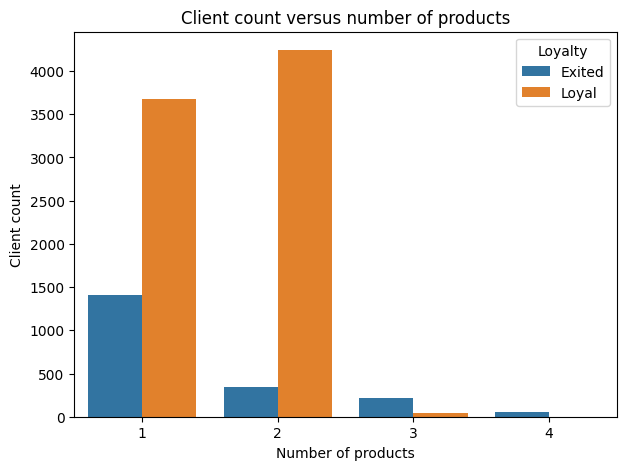

In [35]:
churn_vs_numprod = churn_df[['NumOfProducts', 'Exited', 'ExitedStr']].pivot_table(
    index='NumOfProducts', columns='ExitedStr', values='Exited', aggfunc='count').fillna(0).reset_index()
churn_vs_numprod['NumOfProducts'] = churn_vs_numprod['NumOfProducts'].astype('str')
churn_vs_numprod = churn_vs_numprod.melt(id_vars='NumOfProducts', var_name='Exited', value_name='ClientCount')

fig = plt.figure(figsize=(7,5))
bar_plot = sns.barplot(churn_vs_numprod, x='NumOfProducts', y='ClientCount', hue='Exited')
bar_plot.set_xlabel('Number of products')
bar_plot.set_ylabel('Client count')
bar_plot.set_title('Client count versus number of products')
bar_plot.legend(title='Loyalty')

Слишком большое количество банковских услуг, если их количество от трёх и больше, резко повышает вероятность оттока клиентов из-за резкого роста сложности отслеживания клиентом всех подключенных услуг. Для сокращения количества услуг нужно вводить пакетные услуги с предсказуемой ежемесячной платой.

8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

Text(0.5, 1.0, 'Inactive clients')

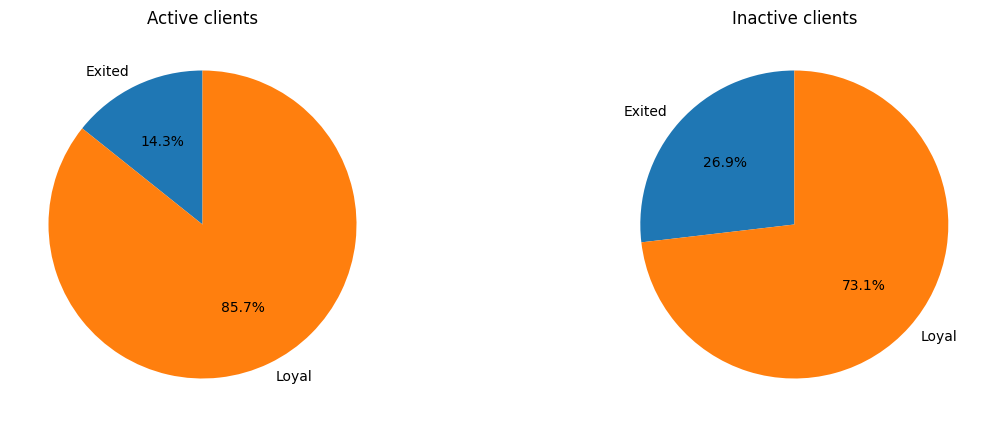

In [36]:
churn_df['IsActiveMemberStr'] = churn_df['IsActiveMember'].map({0: 'Inactive', 1: 'Active'})
active_exited_df = churn_df.pivot_table(index='ExitedStr', columns='IsActiveMemberStr', values='Surname', aggfunc='count')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,5))
pie_chart_1 = axes[0].pie(active_exited_df['Active'], labels=active_exited_df.index, autopct='%.1f%%', startangle=90)
axes[0].set_title('Active clients')
pie_chart_2 = axes[1].pie(active_exited_df['Inactive'], labels=active_exited_df.index, autopct='%.1f%%', startangle=90)
axes[1].set_title('Inactive clients')

Неактивные клиенты уходят в два раза чаще, чем активные. Привлечь неактивных клиентов можно акциями, предлагающими или повышенный кэшбек при расчётах картой, или повышенную ставку по вкладам, или кредитную карту с увеличенным беспроцентным периодом.

9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [37]:
# Plotly charts visualization ploblem fix

# %pip install plotly

# %pip install ipykernel
# or
# %pip install --upgrade nbformat

import plotly
import plotly.express as px

In [38]:
churn_by_countries_df = churn_df[['Geography', 'Exited']].groupby(by='Geography').mean().apply(lambda x: x*100.0).reset_index()

fig = px.choropleth(
    data_frame=churn_by_countries_df,
    locations='Geography',
    locationmode = 'country names',
    scope='europe',
    fitbounds='locations',
    color='Exited',
    range_color=[0, 100],
    title='Client churn',
    width=800,
    height=500,
    color_continuous_scale='Reds'
)
fig.show()

Самая большая доля ушедших клиентов наблюдается в Германии. Вероятно, в Германии присутствует сильный банк-конкурент, предлагающий более выгодные условия и переманивающий клиентов к себе.

10. На основе сводной таблицы по времени использования услуг банка и кредитному рейтингу постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

Text(95.72222222222221, 0.5, 'Credit rating')

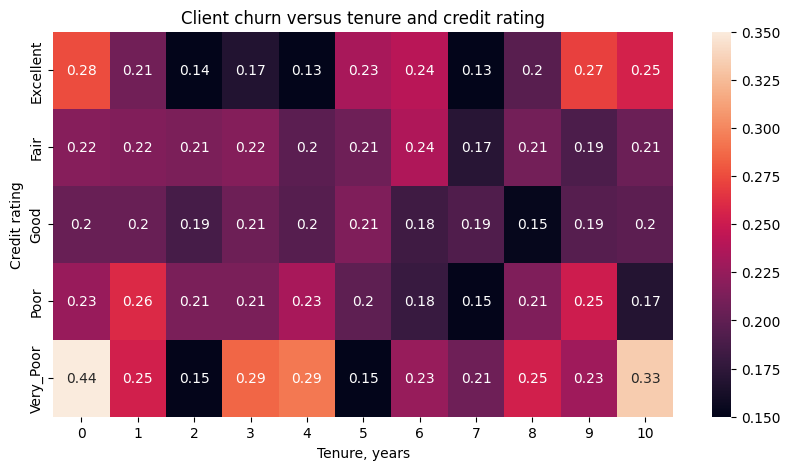

In [39]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

churn_df['CreditScoreCat'] = churn_df['CreditScore'].apply(get_credit_score_cat)

fig = plt.figure(figsize=(10,5))
credit_score_tenure_df = churn_df.pivot_table(index='CreditScoreCat', columns='Tenure', values='Exited', aggfunc='mean')

heatmap_chart = sns.heatmap(credit_score_tenure_df, annot=True, cmap='rocket', vmin=0.15, vmax=0.35)
heatmap_chart.set_title('Client churn versus tenure and credit rating')
heatmap_chart.set_xlabel('Tenure, years')
heatmap_chart.set_ylabel('Credit rating')

Чаще всего уходят клиенты с плохой и очень кредитной историей, которые только начали пользоваться услугами банка или пользуются услугами банка очень давно. Также уходят клиенты с отличной кредитной историей. Банку следует снизить процентную ставку по кредитам и увеличить максимальный срок кредитования, чтобы уменьшить ежемесячные платежи и сократить риск задержек платежей клиентами, которые приводят к ухудшению их кредитной истории.